In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stat
from scipy.stats import norm
from scipy.stats import expon

In [4]:
# Part (a)

#This loads the data into matrices, one colum for each feature
benign = np.genfromtxt("benigndata.csv", delimiter = ",")
malignant = np.genfromtxt("malignantdata.csv", delimiter = ",")

# calculate the sample means for the texture and perimeter for b
# each column in the the benign and malignant datasets.  \
# Print the means as the answer to part (a)
print(np.mean(benign, axis=0))
print(np.mean(malignant,axis=0))

[17.1157  76.96375]
[ 21.4498  114.53195]


In [5]:
# Part (b)
# calculate the sample variance for the texture and perimeter for
# both the benign and malignant datasets.  Print the variances as the answer to this part
print(np.var(benign, axis=0, ddof=1))
print(np.var(malignant, axis=0, ddof=1))

[ 11.27652514 127.96211401]
[ 13.89054569 472.34102382]


In [6]:
## this function gets a column of data, and uses the built-in function plt.hist to plot a histogram of the data,
## and then computes the mean and variance of the data, and plots a Gaussian approximation to the PDF, by generating points
## for the Gaussian PDF for that mean and variance.  
## It saves the figure to a file.  Read the function and use the inputs to label the plots.  Change 
## the function if you wish. 

def plotit(X,name,feat, num):
    fig = plt.figure()
    plt.hist(X,bins="auto",density=True) 
    xmin, xmax = plt.xlim() 
    xpoints = np.linspace(xmin, xmax, 200)
    ave = np.mean(X)
    var = np.var(X)
    #PDF for Gaussian with mean mu and standard deviation std.
    pdf = norm.pdf(xpoints, ave, np.sqrt(var)) 
    plt.plot(xpoints, pdf, "r", linewidth=2)

    plt.xlabel(f'Average {feat}')
    plt.ylabel('Probability density')
    plt.legend(['Gaussian Fit','Normalized Histogram'])
    plt.title(f"{name} average {feat}: Normalized histogram vs Gaussian fit")
    plt.show()
    fig.savefig(f'hw4_s23_python{num}.png')
    return


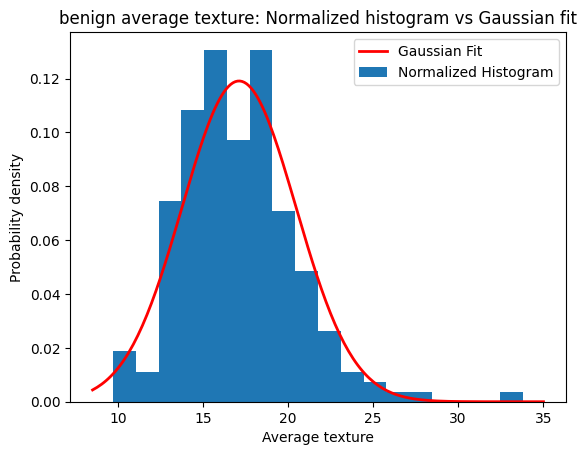

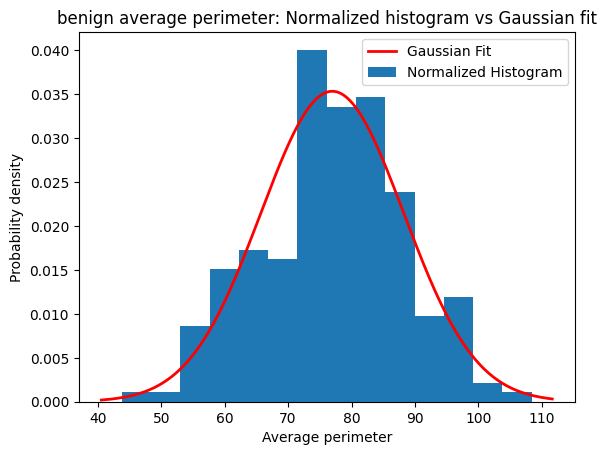

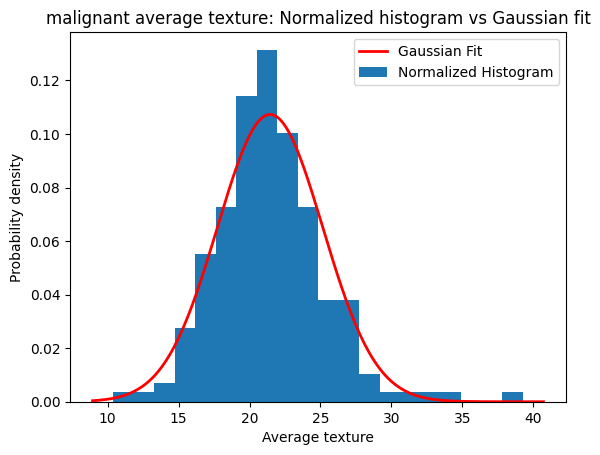

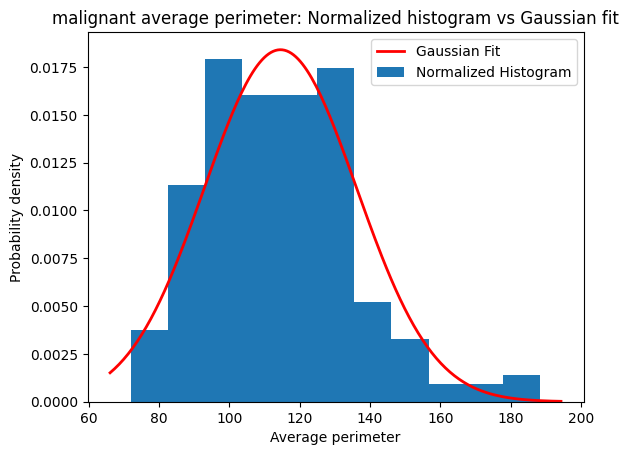

In [7]:
# Part (c). Fit a Gaussian approximation to the normallzed histogram of each of the 
# features in the benigh and malignant data sets.  Use the plotit function above. 
# using the plotit function, 
plotit(benign[:, 0], 'benign', 'texture', 0)
plotit(benign[:, 1], 'benign', 'perimeter', 1)
plotit(malignant[:, 0], 'malignant', 'texture', 2)
plotit(malignant[:, 1], 'malignant', 'perimeter', 3)

52.81544133593581


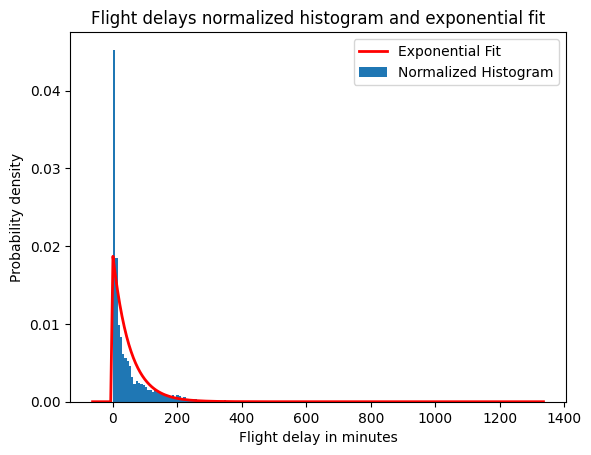

In [11]:
# Part (d).  Read in the delays from the provided file "uniteddelays.csv" similar to how it was
# done earlier. Compute the average of the delays, and using this, compute the appropriate 
# parameter for an exponential distribution that has the same average.  Then, use the

# Read the data
delays = np.genfromtxt("uniteddelays.csv", delimiter = ",")

# Compute the average delay and store it in the variable average_delay
average_delay = np.mean(delays, axis=0)
print(average_delay)

# Compute the parameter lambda for the exponential distribution, useful in the next part
lamda = 1.0/average_delay

# Plot
fig = plt.figure()
plt.hist(delays,bins="auto",density=True) 
xmin, xmax = plt.xlim() 
xpoints = np.linspace(xmin, xmax, 200)
pdf = expon.pdf(xpoints, scale=average_delay)

plt.plot(xpoints, pdf, "r", linewidth=2)
plt.xlabel('Flight delay in minutes')
plt.ylabel('Probability density')
plt.legend(['Exponential Fit','Normalized Histogram'])
plt.title(f"Flight delays normalized histogram and exponential fit")
plt.show()
fig.savefig('hw4_s23_python5.png')

In [15]:
# Part (e)  Using the exponential model, predict the probability 
# that a delayed flight takes longer than 60 minutes to depart.  Compare this predicted
# probability to the fraction of flights that are actually delayed that much

# Since you know the exact form of the CDF for an exponential random variable, 
# this is just 1 - F_X(60), where F_X is the cdf. 
print(1 - (1 - math.exp(-lamda * 60)))

count = 0
total = 0
for delay in delays:
    if delay > 60:
        count += 1
    total += 1
print(str(count) + " out of " + str(total))

0.32109077601786185
1205 out of 4611


In [10]:
print(1 - norm.cdf(0.85))

0.19766254312269238
